In [1]:
import pandas as pd
import numpy as np
from collections import deque
from copy import copy

In [2]:
import sys
from IPython.display import Image
sys.path.append('../src')

from latency_data import LatencyData

import os

BASE_PATH_DIR = '../input/'
BASE_PATH_DIR_ORG = '../data_raw/'

dataset_dir = os.path.join(BASE_PATH_DIR,"npm_preprocess.csv") # npm_preprocess nova_preprocess

stream = LatencyData(dataset_dir,91,96,True)



In [3]:
def draw_example(df,time_elapsed):
    
    next = df.head(1).copy()
    df_new = df.drop(0, axis=0).reset_index(drop=True)

    return df_new, next, time_elapsed.pop(0)

### Framework Verification Latency

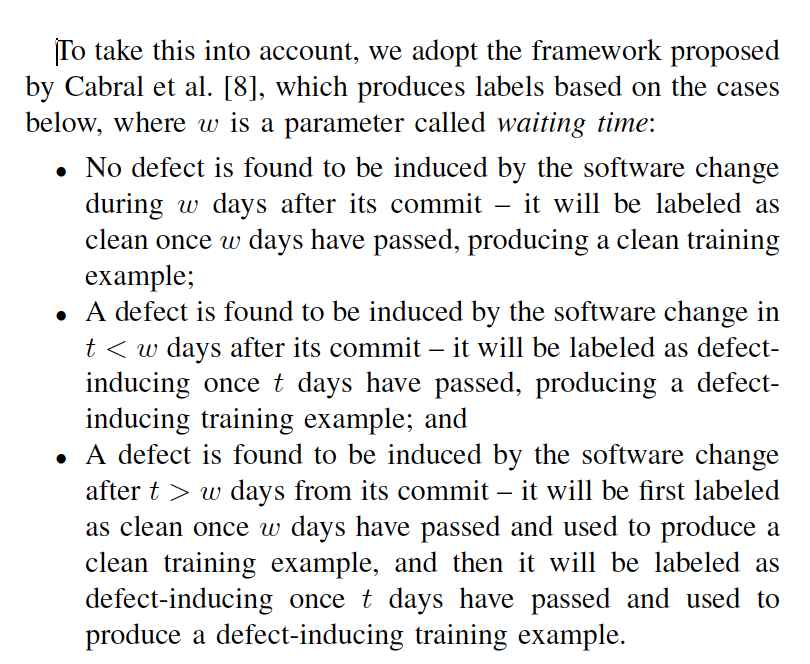

In [4]:
Image('vl.png')

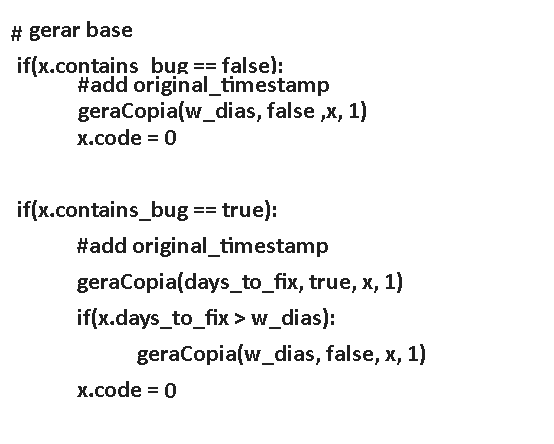

In [5]:
Image('vl_pseudo_gera_base.png')

### Dataset Nova - Original

In [6]:
df_org  = pd.read_csv(os.path.join(BASE_PATH_DIR_ORG,"npm.csv"))

In [7]:
df_org.head(5)

hashcode      fix   ns   nd   nf   entrophy   la   ld     lt   ndev  \
0  1254244893   False    2    2    6   2.104223  288    0    0.0      1   
1  1254261636   False    1    1    1   0.000000    0    2    5.0      1   
2  1254261666   False    1    1    1   0.000000   94   19   77.0      1   
3  1254261833    True    1    1    1   0.000000    0   41  152.0      1   
4  1254261889   False    1    1    1   0.000000    1    1    3.0      1   

        age   nuc   exp        rexp   sexp  containsbug   timestamp  \
0  0.000000     0   2.5    0.000000      1        False  1254244893   
1  0.193785     1   6.0    6.160366      4        False  1254261636   
2  0.194132     1   7.0    6.151136      5         True  1254261666   
3  0.001933     2   8.0  518.365270      6        False  1254261833   
4  0.196713     1   9.0    6.083549      7        False  1254261889   

    daystofix  
0      0.0000  
1      0.0000  
2      0.0019  
3      0.0000  
4      0.0000

In [8]:
df_org.shape

(7920, 18)

### Dataset Nova - Verificação de latência

In [9]:
data = stream._new_df

In [10]:
data.head(5)

hashcode  fix  ns  nd  nf  entrophy   la  ld     lt  ndev       age  nuc  \
0  1254244893    0   2   2   6  2.104223  288   0    0.0     1  0.000000    0   
1  1254261636    0   1   1   1  0.000000    0   2    5.0     1  0.193785    1   
2  1254261666    0   1   1   1  0.000000   94  19   77.0     1  0.194132    1   
3  1254261666    0   1   1   1  0.000000   94  19   77.0     1  0.194132    1   
4  1254261833    1   1   1   1  0.000000    0  41  152.0     1  0.001933    2   

   exp        rexp  sexp  arrival_time  daystofix  available_time  class  code  
0  2.5    0.000000     1      0.000000     0.0000        0.000000      0     0  
1  6.0    6.160366     4      0.193785     0.0000        0.193785      0     0  
2  7.0    6.151136     5      0.194132     0.0019        0.194132      1     0  
3  7.0    6.151136     5      0.194132     0.0019        0.196032      1     1  
4  8.0  518.365270     6      0.196065     0.0000        0.196065      0     0

In [11]:
data.shape

(16599, 20)

### Exemplo de instância limpa com V.L

In [13]:
data[data.hashcode==1254244893]

hashcode  fix  ns  nd  nf  entrophy   la  ld   lt  ndev  age  nuc  exp  \
0   1254244893    0   2   2   6  2.104223  288   0  0.0     1  0.0    0  2.5   
32  1254244893    0   2   2   6  2.104223  288   0  0.0     1  0.0    0  2.5   

    rexp  sexp  arrival_time  daystofix  available_time  class  code  
0    0.0     1           0.0        0.0             0.0      0     0  
32   0.0     1           0.0        0.0            91.0      0     1

### Exemplo de instância alvo com atributo daystofix <= w_days

In [14]:
data[data.hashcode==1254261666]

hashcode  fix  ns  nd  nf  entrophy  la  ld    lt  ndev       age  nuc  \
2  1254261666    0   1   1   1       0.0  94  19  77.0     1  0.194132    1   
3  1254261666    0   1   1   1       0.0  94  19  77.0     1  0.194132    1   

   exp      rexp  sexp  arrival_time  daystofix  available_time  class  code  
2  7.0  6.151136     5      0.194132     0.0019        0.194132      1     0  
3  7.0  6.151136     5      0.194132     0.0019        0.196032      1     1

### Exemplo de instância alvo com atributo daystofix > w_days

In [19]:
data[data.hashcode==1266828723]

hashcode  fix  ns  nd  nf  entrophy  la  ld   lt  ndev  age  nuc  \
110   1266828723    0   1   1   1       0.0  34   0  0.0     1  0.0    0   
631   1266828723    0   1   1   1       0.0  34   0  0.0     1  0.0    0   
1044  1266828723    0   1   1   1       0.0  34   0  0.0     1  0.0    0   

        exp  rexp  sexp  arrival_time  daystofix  available_time  class  code  
110   124.0   0.0    37    145.646181   152.9481      145.646181      1     0  
631   124.0   0.0    37    145.646181   152.9481      236.646181      0     1  
1044  124.0   0.0    37    145.646181   152.9481      298.594281      1     1

### Anomalia para casos daystofix == 0 e bug==True (Instâncias diferentes com hashcode iguais )

In [20]:
data[data['class']==1].query('daystofix ==0').shape

(0, 20)

########################################################################################

### Dataset para o modelo 

In [21]:
df = stream.load_data_with_latency()


In [22]:
df.head(5)

fix  ns  nd  nf  entrophy   la  ld     lt  ndev       age  nuc  exp  \
0    0   2   2   6  2.104223  288   0    0.0     1  0.000000    0  2.5   
1    0   1   1   1  0.000000    0   2    5.0     1  0.193785    1  6.0   
2    0   1   1   1  0.000000   94  19   77.0     1  0.194132    1  7.0   
3    0   1   1   1  0.000000   94  19   77.0     1  0.194132    1  7.0   
4    1   1   1   1  0.000000    0  41  152.0     1  0.001933    2  8.0   

         rexp  sexp  class  code  
0    0.000000     1      0     0  
1    6.160366     4      0     0  
2    6.151136     5      1     0  
3    6.151136     5      1     1  
4  518.365270     6      0     0

In [23]:
df[df['code']==0].shape

(7920, 16)

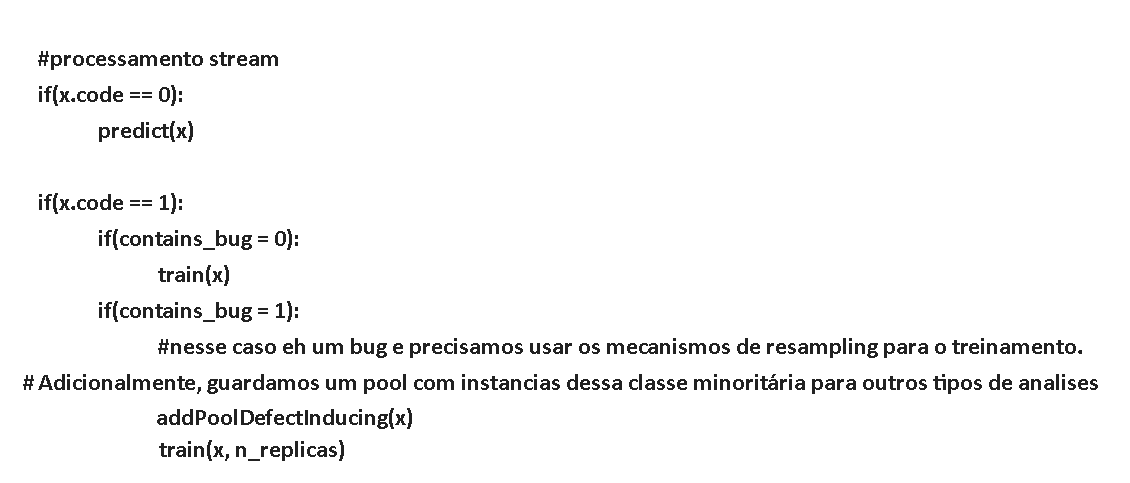

In [24]:
Image('vl_pseudo_trata_stream.png')

In [ ]:
#from datetime import datetime
#datetime.now().strftime("%Y_%m_%d_%H_%M_%S")